In [1]:
import os
os.environ['ROOK_URL'] = 'http://cp4cds-cn1.dkrz.de/wps'

In [2]:
from rooki import rooki
rooki.url

'http://cp4cds-cn1.dkrz.de/wps'

In [3]:
collection = 'c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest'
time = '1880-01-01/1900-12-30'

In [4]:
resp = rooki.subset(collection, time=time)
resp.ok

True

In [5]:
resp.download_urls()

['http://cp4cds-cn1.dkrz.de:80/outputs/rook/9638b4ae-2854-11eb-9384-f2e4655a10b7/tas_day_EC-EARTH_historical_r1i1p1_18800101-19001229.nc']

## prov document ... not part of interface yet

In [6]:
prov_json_url = resp.response.processOutputs[1].reference
prov_json_url

'http://cp4cds-cn1.dkrz.de:80/outputs/rook/92f4e6c8-2854-11eb-9384-f2e4655a10b7/provenance.json'

In [7]:
import requests
requests.get(prov_json_url).json()

{'prefix': {'project': 'https://cds.climate.copernicus.eu/ns/project',
  'software': 'https://cds.climate.copernicus.eu/ns/software',
  'workflow': 'https://cds.climate.copernicus.eu/ns/workflow',
  'operator': 'https://cds.climate.copernicus.eu/ns/operator',
  'parameter': 'https://cds.climate.copernicus.eu/ns/parameter',
  'collection': 'https://cds.climate.copernicus.eu/ns/collection',
  'file': 'https://cds.climate.copernicus.eu/ns/file'},
 'agent': {'project:Copernicus Climate Data Store': {},
  'software:rook==0.1.0': {'prov:type': 'prov:SoftwareAgent'},
  'software:daops==0.2.0': {'prov:type': 'prov:SoftwareAgent'}},
 'wasAttributedTo': {'_:id1': {'prov:entity': 'software:rook==0.1.0',
   'prov:agent': 'project:Copernicus Climate Data Store'}},
 'activity': {'operator:subset': {'parameter:time': '1880-01-01/1900-12-30',
   'prov:startedAtTime': '2020-11-17T09:15:00',
   'prov:endedAtTime': '2020-11-17T09:30:00'}},
 'entity': {'collection:c3s-cmip5.output1.ICHEC.EC-EARTH.historic

In [8]:
prov_plot_url = resp.response.processOutputs[2].reference
prov_plot_url

'http://cp4cds-cn1.dkrz.de:80/outputs/rook/92f4e6c8-2854-11eb-9384-f2e4655a10b7/provenance.png'

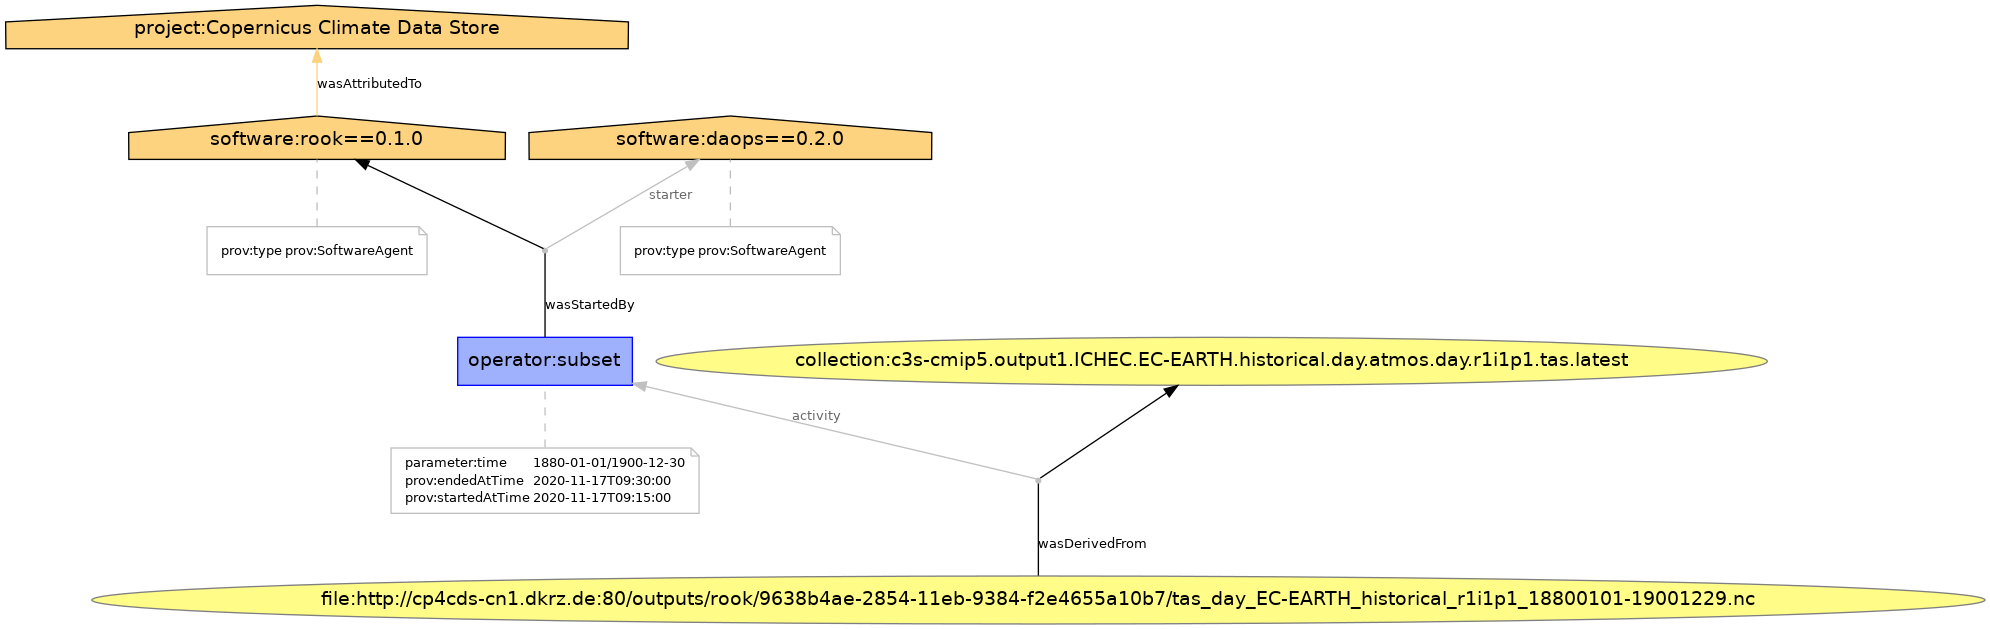

In [9]:
from IPython.display import Image
Image(prov_plot_url)